## DPS BATCH#21 AI Engineering Track Challenge ##

In [1]:
""""Importing all the required Libraries & Dependencies"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import joblib

In [2]:
"""Loading the dataset from the CSV file"""
file_path = "monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv"
df = pd.read_csv(file_path)

In [3]:
"""Displaying the first few rows of the DataFrame (df) to check if the dataset loaded correctly"""

df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN,NaN,NaN,NaN,NaN


In [4]:
"""Filtering the dataset to include only values in the column before the year 2020"""

df = df[df['JAHR'] <= 2020]

In [5]:
"""Displaying the first few rows of the modified DataFrame (df) to check for any changes made in above cell)"""

df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
36,Alkoholunfälle,insgesamt,2020,202001,28.0,22.0,-20.00,27.27,37.0
37,Alkoholunfälle,insgesamt,2020,202002,40.0,28.0,42.86,42.86,38.0
38,Alkoholunfälle,insgesamt,2020,202003,27.0,34.0,-32.50,-20.59,37.0
39,Alkoholunfälle,insgesamt,2020,202004,26.0,36.0,-3.70,-27.78,36.0
40,Alkoholunfälle,insgesamt,2020,202005,40.0,39.0,53.85,2.56,36.0


## Selecting Important Columns in the DataFrame

Columns:
- 'MONATSZAHL'
- 'AUSPRAEGUNG'
- 'JAHR'
- 'MONAT'
- 'WERT'

Making the DataFrame include only these important columns.
## Selecting Important Columns in the DataFrame

Columns:
- 'MONATSZAHL'
- 'AUSPRAEGUNG'
- 'JAHR'
- 'MONAT'
- 'WERT'

Making the DataFrame include only these important columns.

In [6]:
features = ['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT']
df = df[features]



## Renaming columns in the DataFrame for better clarity.

Column Renaming:
- 'MONATSZAHL' to 'Category'
- 'AUSPRAEGUNG' to 'AccidentType'
- 'JAHR' to 'Year'
- 'MONAT' to 'Month'
- 'WERT' to 'Value'

In [7]:
df = df.rename( columns = { 'MONATSZAHL':'Category','AUSPRAEGUNG':'AccidentType','JAHR':'Year','MONAT':'Month','WERT':'Value'})

In [8]:
"""Displaying the first few rows of the modified DataFrame (df) to check for any changes made in above cell)"""
df.head()

,Category,AccidentType,Year,Month,Value
36,Alkoholunfälle,insgesamt,2020,202001,28.0
37,Alkoholunfälle,insgesamt,2020,202002,40.0
38,Alkoholunfälle,insgesamt,2020,202003,27.0
39,Alkoholunfälle,insgesamt,2020,202004,26.0
40,Alkoholunfälle,insgesamt,2020,202005,40.0



### Converting the 'Month' column in the DataFrame to a datetime format.The 'Month' column initially contains values like "202001" where the format is year followed by month.



In [9]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y%m').dt.month

"""Displaying the first few rows of the DataFrame to verify the changes"""

df.head()

,Category,AccidentType,Year,Month,Value
36,Alkoholunfälle,insgesamt,2020,1,28.0
37,Alkoholunfälle,insgesamt,2020,2,40.0
38,Alkoholunfälle,insgesamt,2020,3,27.0
39,Alkoholunfälle,insgesamt,2020,4,26.0
40,Alkoholunfälle,insgesamt,2020,5,40.0


In [11]:
"""Resetting the index of the DataFrame."""

df.reset_index(drop=True, inplace=True)

In [12]:
"""Displaying the first few rows of the DataFrame to verify the changes"""
df.head()

,Category,AccidentType,Year,Month,Value
0,Alkoholunfälle,insgesamt,2020,1,28.0
1,Alkoholunfälle,insgesamt,2020,2,40.0
2,Alkoholunfälle,insgesamt,2020,3,27.0
3,Alkoholunfälle,insgesamt,2020,4,26.0
4,Alkoholunfälle,insgesamt,2020,5,40.0



### Displaying information about the DataFrame and checking for null values.

In [13]:
df.info()

# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Display the count of null values for each column
print(null_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1764 non-null   object 
 1   AccidentType  1764 non-null   object 
 2   Year          1764 non-null   int64  
 3   Month         1764 non-null   int32  
 4   Value         1764 non-null   float64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 62.1+ KB
Category        0
AccidentType    0
Year            0
Month           0
Value           0
dtype: int64


## Data-Visualization and Analysis


C:\Users\ashwa\AppData\Local\Temp\ipykernel_29324\699550418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.catplot(x="Category", kind="count", data=df, palette="winter_r")


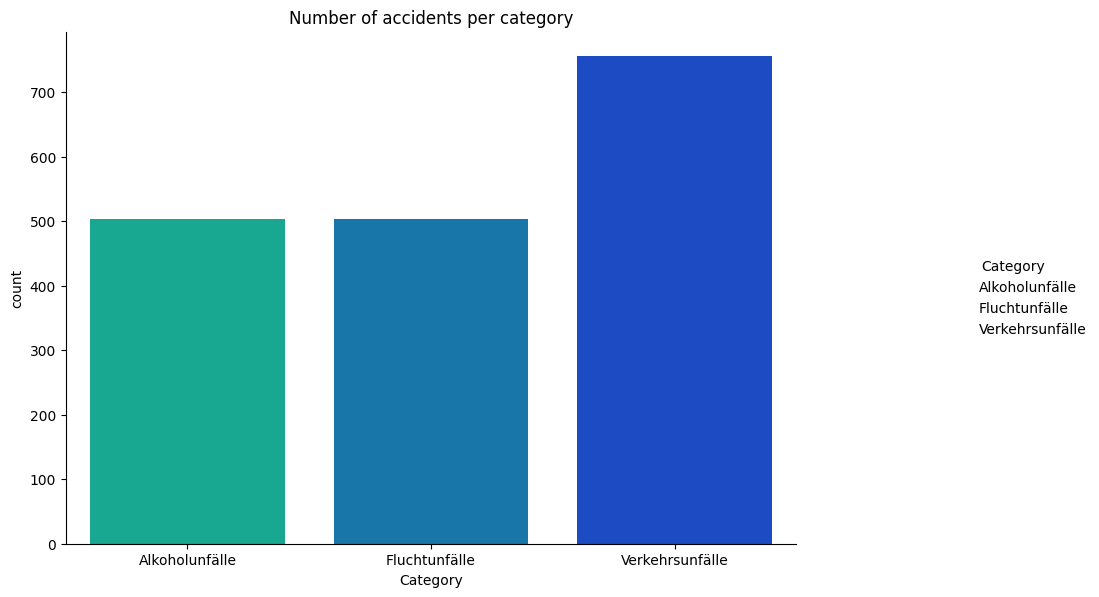

In [14]:
# Visualizing the distribution of accidents across categories
plot = sns.catplot(x="Category", kind="count", data=df, palette="winter_r")
plt.title('Number of accidents per category')
plt.gcf().set_size_inches(12,6)


### Observations:
- The plot displays the count of accidents in each category.
- Categories are represented on the x-axis, and the height of each bar indicates the accident count.
- The winter-themed color palette is applied for better visualization

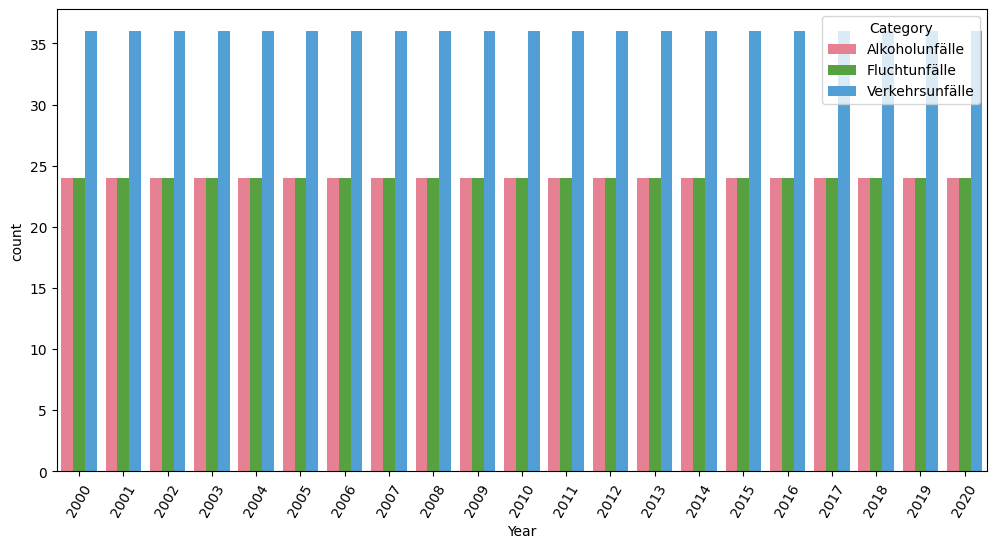

In [15]:
# Visualizing the count of accidents per year and category
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Category', data=df, palette="husl")
plt.xlabel('Year')
plt.xticks(rotation=60)
plt.show()

### Observations:

- The plot illustrates the count of accidents for each year, categorized by accident Category.
- The x-axis represents the years, and bars are grouped by categories, distinguished by different colors.
- The hue parameter helps to differentiate categories within each year.

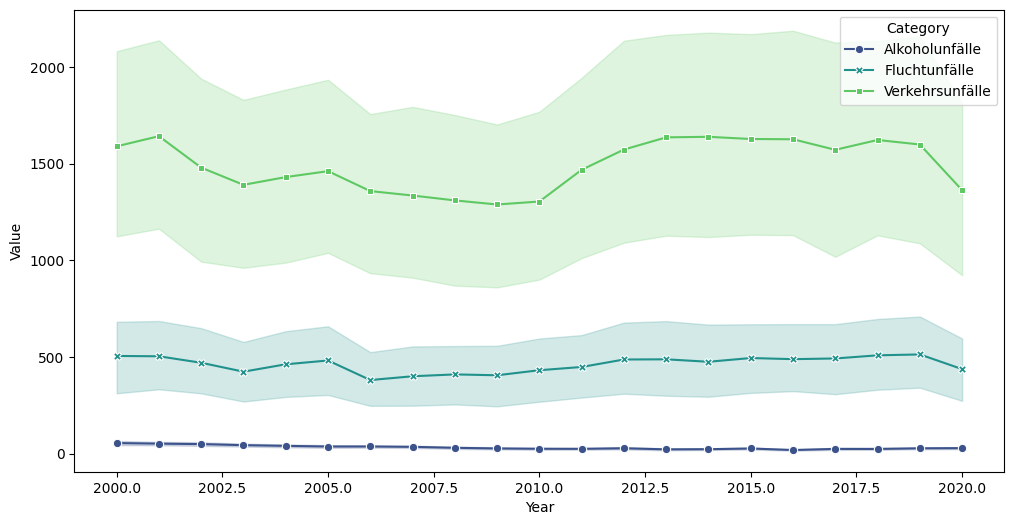

In [16]:
# Visualizing the trend of accident values over the years for each category
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', data=df, hue='Category', style='Category', markers=True, dashes=False, palette="viridis")
plt.show()


### Observations:

- This line plot depicts the trend of accident values over the years, differentiated by categories.
- The x-axis represents the years, the y-axis represents the accident values, and different lines represent various accident categories.
- Markers are added to highlight specific data points on each line.


# Model Training 
- ### Chose Supervised Machine Learning:
Given the historical accident data, opted for supervised ML as it involves predicting a target variable (accident count)
based on features (e.g., year, month). This approach allows leveraging patterns and trends in existing data.

- ### Started with Linear Regression:
Linear Regression provides a baseline model for predicting numeric values. Given the simplicity of the problem 
and the need to establish a benchmark, linear regression is a straightforward choice to understand the initial
relationship between features (year, month) and the target variable (accident count).


In [17]:
# Filter data for the specified category, type, and time period
filtered_df = df[(df['Category'] == 'Alkoholunfälle') & (df['AccidentType'] == 'insgesamt')]

### Sort data by Year and Month:
Arranged the filtered DataFrame (`filtered_df`) to be in chronological order, first by Year and then by Month.

In [18]:
filtered_df = filtered_df.sort_values(['Year', 'Month'])

### Drop rows with NaN values:
Removed rows containing missing values (NaN) from the DataFrame (`filtered_df`) to ensure clean and complete data.


In [19]:
filtered_df = filtered_df.dropna()

### Select features and target variable:
Identified features ('Year', 'Month') and the target variable ('Value') for the supervised learning model.


In [20]:
features = ['Year', 'Month']
X = filtered_df[features]
y = filtered_df['Value']

### Split the data into training and testing sets:
Partitioned the dataset into training and testing sets to assess the model's performance on unseen data.


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Scale the features using MinMaxScaler:
Utilized MinMaxScaler to scale the features (Year, Month) to a specific range, ensuring uniformity in feature magnitudes.


In [23]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Create and train the Linear Regression model:
Initialized a Linear Regression model and trained it on the scaled training data to establish a predictive relationship
between the features and the target variable (accident count).


In [24]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

### Make predictions for a custom input:
Generated predictions for the specified input (January 2021) using the trained Linear Regression model
and the previously scaled features.


In [25]:
custom_input = np.array([[2021, 1]]) 
custom_input_scaled = scaler.transform(custom_input)
predicted_value = model.predict(custom_input_scaled)

print("Predicted Value:", predicted_value[0])

Predicted Value: 16.624313752837267


c:\Users\ashwa\OneDrive\Desktop\DPS-AI-TASK\env\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Evaluate the model performance:
Calculated the Root Mean Squared Error (RMSE) as a metric to assess the accuracy of the Linear Regression model
on the test data. RMSE is a measure of the difference between predicted and actual values, providing insight into
the model's predictive capability.

In [26]:
mse = mean_squared_error(y_test, model.predict(X_test_scaled))
rmse = np.sqrt(mse)
print("Root Mean Squared Error is:", rmse)

Root Mean Squared Error is: 12.013895610184823
